In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Memuat dataset
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.columns

In [ ]:
# Melakukan encoding pada kolom kategorikal menggunakan LabelEncoder
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Menentukan fitur (X) dan target (y)
X = df.drop(['NObeyesdad'], axis=1)  # Menghapus kolom target
y = df['NObeyesdad']  # Kolom target


# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Konversi data ke tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# Menyusun model MLP untuk regresi
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, activation):
        super(MLPRegression, self).__init__()
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.neurons = neurons
        self.activation = activation

        # Membuat layer input ke layer tersembunyi
        layers = []
        layers.append(nn.Linear(self.input_size, self.neurons))

        # Menambahkan hidden layers
        for _ in range(self.hidden_layers - 1):
            layers.append(self.activation())
            layers.append(nn.Linear(self.neurons, self.neurons))

        layers.append(nn.Linear(self.neurons, 1))  # Layer output

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze()

In [ ]:
# Setup perangkat (GPU jika tersedia)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ... (Your other code) ...

# Import the necessary metrics functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melakukan eksperimen dengan kombinasi hyperparameter
for layers in hidden_layers:
    for neuron in neurons:
        for activation in activations:
            for epochs in epochs_list:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        # ... (Your model training and evaluation code) ...

                        # Evaluasi model setelah pelatihan
                        model.eval()
                        with torch.no_grad():
                            y_pred = model(X_test_tensor.to(device)).cpu().numpy()
                            mae = mean_absolute_error(y_test, y_pred)  # Now this line should work
                            mse = mean_squared_error(y_test, y_pred)
                            r2 = r2_score(y_test, y_pred)
                            accuracy = (1 - mae / max(y_test)) * 100  # Estimasi akurasi

                        # Menyimpan hasil
                        results.append({
                            'layers': layers,
                            'neurons': neuron,
                            'activation': activation.__name__,
                            'epochs': epochs,
                            'lr': lr,
                            'batch_size': batch_size,
                            'mae': mae,
                            'mse': mse,
                            'r2': r2,
                            'accuracy': accuracy
                        })
                        print(f"Layers: {layers}, Neurons: {neuron}, Activation: {activation.__name__}, Epochs: {epochs}, LR: {lr}, Batch Size: {batch_size}, Accuracy:{accuracy}")


In [ ]:
# Mengonversi hasil ke DataFrame dan menyimpannya ke CSV
results_df = pd.DataFrame(results)
results_df.to_csv("mlp_regression_hidden layer 123.csv", index=False)
print("All results have been saved to 'mlp_regression_hidden layer 123.csv'.")

All results have been saved to 'mlp_regression_hidden layer 123.csv'.


In [33]:
# Setup perangkat (GPU jika tersedia)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameter yang akan diuji
hidden_layers = [1, 2, 3]
neurons = [4, 8, 16, 32, 64]
activations = [nn.Sigmoid, nn.ReLU, nn.Softmax, nn.Tanh]  # Changed nn.RelU to nn.ReLU
epochs_list = [1,10,25,50,100,250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16,32,64,128,256,512]

# Menyimpan hasil
results = []

# Melakukan eksperimen dengan kombinasi hyperparameter
for layers in hidden_layers:
    for neuron in neurons:
        for activation in activations:
            for epochs in epochs_list:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        # Membuat dan memindahkan model ke perangkat (GPU atau CPU)
                        model = MLPRegression(input_size=X_train_tensor.shape[1],
                                              hidden_layers=layers,
                                              neurons=neuron,
                                              activation=activation).to(device)

                        # Mendefinisikan loss function dan optimizer
                        criterion = nn.MSELoss()
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        # Training loop
                        for epoch in range(epochs):
                            model.train()
                            optimizer.zero_grad()
                            outputs = model(X_train_tensor.to(device))
                            loss = criterion(outputs, y_train_tensor.to(device))
                            loss.backward()
                            optimizer.step()

                        # Evaluasi model setelah pelatihan
                        model.eval()
                        with torch.no_grad():
                            y_pred = model(X_test_tensor.to(device)).cpu().numpy()
                            mae = mean_absolute_error(y_test, y_pred)
                            mse = mean_squared_error(y_test, y_pred)
                            r2 = r2_score(y_test, y_pred)
                            accuracy = (1 - mae / max(y_test)) * 100  # Estimasi akurasi

                        # Menyimpan hasil
                        results.append({
                            'layers': layers,
                            'neurons': neuron,
                            'activation': activation.__name__,
                            'epochs': epochs,
                            'lr': lr,
                            'batch_size': batch_size,
                            'mae': mae,
                            'mse': mse,
                            'r2': r2,
                            'accuracy': accuracy
                        })
                        print(f"Layers: {layers}, Neurons: {neuron}, Activation: {activation.__name__}, Epochs: {epochs}, LR: {lr}, Batch Size: {batch_size}, Accuracy:{accuracy}")


Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-13339.399520537345
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-31037.962026442012
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-670.395288963408
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-16453.063125982353
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-15487.960743528356
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-27098.05232392605
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:55.68496387619217
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:13.827086669239497
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 64, Accuracy:-17.369325258207645
Layers: 1, Neurons: 4, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:55.792366650463364
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:53.427452001048415
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:52.51147988288303
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:56.43042788860646
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:53.84428325315411
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:42.976979642425405
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:57.45663358833586
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:54.04280330883038
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:60.016095680547956
Layer

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-1225.8116805525256
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-1468.5214063706035
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-4688.395247222684
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:42.699913832030965
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:72.40836475663903
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:62.552587379142935
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:66.60319767757323
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:65.41723583137266


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:67.76422635601486
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:74.48705884769642
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:66.2099303646854
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:74.63237756439041
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:74.64465775576232
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:67.27750423482499
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:68.12834493563436
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:44.809832314133544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:59.7128635814004
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:59.674635848912594
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:59.17044605816133
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:58.91240301260898
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:50.83894050490021
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:54.85165404453816
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:51.51055726399565
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:52.02130809972332


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:48.094990873860496
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:55.856987294998575
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:42.83010088570762
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:51.07143681270341
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:59.717874838387154
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:54.92086755045762
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:50.62561279281657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:44.69915367163853
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:45.7730222161686
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-180.09215543550053
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-497.8579169469523
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-1649.7429813899046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-1387.606265621922
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-663.0402422590083
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-863.4434606072657
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:74.0743428727038


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:76.35863294180592
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:76.60572247959855
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:76.6307652325401
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:71.87733257070501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:76.61461150016815
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:75.93427824635877
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:79.87558694220228
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:78.01523800437332


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:77.67681968174553
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:77.59345769412505
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:76.7889014349104
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:64.62242274513574


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:63.66460882978613
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:60.069941544363694
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:63.733085968815686
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:57.98873002600538


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:70.16829211379338
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:54.417459169436476
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:50.850542947955255
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:55.08908440011802


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:59.139009438883704
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:55.7360418557745
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:45.44906596366207
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:47.299443506485275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:57.22482113315892
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:57.79774750871298
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.25843609022107
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:52.17933354222628


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:59.780423339658874
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-413.6433919270833


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-498.89606612230295
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-373.314110851363


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-23.356535229934682
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-127.20153754484569


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-409.9627681916112
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:79.07384553229932


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:76.56567703559702
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:78.14311692337054


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:77.81263145055237
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:79.40784552324655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:79.66230650226181
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:80.98115111026733


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:81.8838568373493
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:79.7186460266722


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:80.01015433605681
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:82.30230378719462


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:80.50935948759293
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:75.01030918929969


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:74.22997954325754
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:75.07987310794321


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:74.4992086885481
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:74.2521243831884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:73.12128231974452
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:49.461886266773384


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:53.29240537428359
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:56.85462705244972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:55.296429732214094
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:52.461396642704486


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:62.44053001287324
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:45.69908231379386


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:50.65344389567667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:43.83260231843795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:49.97826427855391
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:52.95957103034026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:47.980602016897066


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-833.1558903903826


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:74.92321786963161


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:69.18021743930728


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:70.37256389644975


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:72.50624912944339


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:72.80687184856104


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:80.35453366801154


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:80.6191624854849


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:78.01608716154587


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:79.47224130350553


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:79.83362345924708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:81.51124175652639


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:87.26455605668849
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:88.66599428315534


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:87.08570936798955
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:88.74105795736477


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:85.51830777603402


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:82.69837476589062
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:77.43910657692557


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:79.65082430623478


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:78.2572868820999
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:79.28142015674717


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:77.30043746994836
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:77.37833483656905


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:54.263253974999095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:55.584830199526095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:64.83343777175585


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:60.17184506681983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:56.360043018140416
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:53.794445703356544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:56.6882206040447


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:54.45597015785082


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:46.47802780400683


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:49.01985211299338


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:57.122396982448876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:49.82785892880531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:76.34651606434251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:73.90306651639224


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:75.32401449385358


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:75.2461815932494


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:72.87416390493406


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:75.18797439322685


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:87.89250733253053


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:80.66543041955214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:78.77566666937513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:81.92020844436236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:92.17891575690797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:77.6733649819737


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:90.38109777361694


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:94.42094171065999


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:94.10037952346816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:94.38955810851614


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:94.15416120660878


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:93.72080031626801


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:82.53803505005214


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:82.32036919646417


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:83.06852920469663


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:84.48903022482229


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:84.75634455093724


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:83.41660571730071


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:71.66520159858902


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:67.3425335809882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:69.56292357005125


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:64.12142394470173


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:64.25767737969909


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:73.70094545625906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:57.65170215315665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:44.17731408719664


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:52.35187736573983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:50.97102067859696


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:53.94979241480971


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:59.28148802243602
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-3833.471514259951
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-523.561053392547
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-582.7522933154336
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-13778.532711777563
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-5156.27862597376
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-294.11632712193597
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-66.34986211785751
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:-6.9496752358121805
Layers: 2, Neurons: 4, Activation: Tanh, Epochs: 1, L

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 16, Accuracy:50.280354843072004
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy:53.95248561533912
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy:57.32536299478548
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:49.464417196123314
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:55.48108267539875
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:54.53583996734157
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:50.5547469932442
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:46.77653094156226
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:49.698058390436536
Layers: 2, Neurons: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:46.38172916486754
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:-5299.140431770102
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-5543.493629084318
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-11638.623545881894
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-5744.544084021386
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-8664.269515714654
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-5220.071297503532
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:11.416410413476019
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:62.00054231546732
Layers: 2, Neurons: 8, A

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:41.825141034979254
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:3.744078277837015
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:58.7926130580376
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:71.29641083679019
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:77.0354170748528


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:77.59641886133204
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:72.871988283733
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:67.38612759855434
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:76.92995005653448
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:56.31222042678565
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:58.82741952383961


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:61.58864837729902
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:61.27882643277669
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:63.0446068126447
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:60.76816113282604
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:52.939621938159135
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:55.105632580552545


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:47.378827805848836
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:56.33511116436094
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:53.39608961955547
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:55.254146567097415
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:51.50096494648708
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:54.661919262298355


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:44.749699184235105
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:55.993686884148474
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:50.63624120955161
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:53.895370905280956
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-2921.749336837877
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-1019.8261766005352


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-2726.7592019035274
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-1157.4252318734723


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-2265.2466472628744
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-1609.075928185285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:75.00674198517375
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:74.57525313980848
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:66.40084457735644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:60.74156644684392
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:63.27014212724822
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:64.91886245819225


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:79.95609715522228
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:80.60530000920367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:81.04041684815225
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:78.74838811520802
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:80.9544595467753


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:80.26102493488479
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:69.8196921130632
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:66.74382338099258


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:70.26344212704142
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:71.94698688268097
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:69.61538763944326


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:69.19399335498974
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:54.1968349164823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:49.923407332201094
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:53.91457717545725
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:47.75780684852619


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:51.96618159617892
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:48.6642951109073
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:56.28125090078635


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:47.69292579357599
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:53.46682100689628
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.40311809519411


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:57.37776960957417
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:51.07596135170582


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-515.4702562342674
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-80.45775922289789


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-504.00040410840677
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-337.1072423467493


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-295.4100559789238
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-134.41900053392533


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:73.92321727330334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:76.46317230236633


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:77.48176305664158
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:77.15928654110836


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:78.09948317172304
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:73.23067485111918


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:82.98391037399699
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:81.95544889444812
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:84.6643899161577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:83.29990705089179
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:83.85277919007437
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:82.70666889312044


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:74.48373797185972
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:74.78325343958687
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:75.07020896396081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:75.61162890553757
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:74.12240129460304
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:74.82657950163076


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:59.04027415575992
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:62.46170728952514
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:52.184291515085434


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:50.48803589868207
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:57.59823862213709


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:60.056790695404615
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:51.067100088658826
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:52.34729196491723


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:52.13025272071621
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:54.96192521072918
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:53.47876738260777


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:48.97302819388039
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:61.36580039611288


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-303.1608841004007
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:50.92192966229714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:54.885010610329445


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-507.34678588578606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:53.31460488321651


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:80.97396364730582


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:76.20507463213964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:79.19957567332202


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:76.86222371761963


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:77.94541552651107


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:61.172244565706734
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:88.74339215204976


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:85.15957892645616
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:89.65052000420877


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:86.2448490410456
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:87.03187684241573


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:90.33894551913507
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:79.80240867939213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:80.87033282428206
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:80.52645091868649


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:80.18449267315245
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:79.32670379572725


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:80.61828392640732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:63.38526934408784


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:63.885930861611364


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:57.02601862385856


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:64.50825948429633


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:57.84492172459339


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:62.91672225022897


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:52.44393873228812


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:52.732121957050616


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:55.61301229012303


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:53.19652127012482


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:54.39626144977703


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:47.28323786546622


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:-1738.0590452370068


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:69.3562739096447


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:74.60740835672293


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:74.556920958655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:76.2222927324973


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:67.17095130818205


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:81.80081275056158


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:80.16149491377004


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:78.86048110100677


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:76.09696368517324


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:83.16269830233286


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:77.91204327575046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:93.8631712850198


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:92.97900136011242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:92.34626476599345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:93.8886628177243


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:93.43866608432187


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:91.32296806296746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:88.87226537539323


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:88.49121743154113


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:87.10764144129692


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:87.39113724747213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:86.84237023523418


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:87.19870449873855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:73.58459052934339


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:70.65786643700866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:72.66410895930773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:73.65925077663059


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:72.12009738053366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:72.2022022902261


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:53.46245669632845


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:52.89669588994943


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:55.400458587094306


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:50.573850754528095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:47.96535265995255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:54.42736278294671
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-7163.155881732913
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-10985.181401300091
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-4362.041609976779
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-10615.4576005853
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-6356.62821596114
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-14600.554052162019
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-76.63582298021039
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:23.46027265673457
Layers: 2, Neurons: 8, Activation: Tanh, Epochs: 1, LR:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:51.81862146735274
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:49.21374470200991
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:48.30337616521791
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:53.82783000890996
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:47.25308655647428
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:52.1409102617209
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:54.74271810693567
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:47.51162403523686
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:54.31633314530242
Layer

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-6333.243670512411
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-6449.334107166768
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-14412.396834232939
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-11997.244963709814
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-8470.400001610049


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:-11.252327534605723
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:-112.84813231798117
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-105.63692742205681
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:75.17350513320724
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:39.31646666675219
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:31.466395329827858


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:76.88729178022456
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:79.30531543807969
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:76.65303676169721
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:76.74265904535544
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:78.68209016003695
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:75.98525217614652
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:58.774298528125655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:65.17180088845834
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:62.44889777696818
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:59.75257767947102
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:60.22526593166979
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:56.04773776751038
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:52.02718066351402
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:47.085425757910905


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:52.78001406939716
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:51.163591926226104
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:52.388133963759344
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:53.06857924312472
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:52.49021556602689
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:54.079422264281376
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:47.6629349239423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:53.127650866671
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:55.54448128145826
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:52.89246553424496
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-2207.6419788237345
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-2268.7867963473755
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-8571.547092350567
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-8449.950777028282


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-2503.7212579996217
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-2943.0596876933505
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:48.567547320943824


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:23.465249808967535
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:3.4106490929545763
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:63.41760295220864


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:73.29689998904769
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:52.81740509684016
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:78.45167063346898


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:80.29501813429373
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:80.78103803738165
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:79.82035752729321
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:79.05063669779247


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:80.10898615615963
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:72.24474343096206
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:73.56183262111824


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:72.85001175529474
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:73.07956488325993
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:72.59171625307172


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:72.88391106329723
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:53.644840153619654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:53.18246629467811
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:56.17208649926151


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:54.2107636565482
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:54.18949507065322


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:51.350919787689065
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:54.569811246543544
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:52.27490565655173


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:53.640467387905176
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.09708071095535
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:52.63070986614253


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:50.693967091205835
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-1022.668444105168


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-4081.9688152195995


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-2906.6869692129826
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-987.9841614370745


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-1256.1813419122598


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-2154.415475110354


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:73.0949631255851


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:67.48329491198204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:74.92983323368527


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:73.6916907478074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:75.18588731944608


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:77.89279249730873
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:86.73000779440311


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:87.1221406827112
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:86.75945145441285
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:85.79296959465746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:84.85392791676277
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:85.04011119158838
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:77.45747822208419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:76.19922973679407
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:77.39749465804103
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:76.15231253952375


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:77.29388763342813
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:76.5944668352369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:57.511547044612364
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:53.69140351260151
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:59.463724000797754


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:57.06121857190713
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:54.32426130283152


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:57.81554159825011
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:50.46747536981924


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:52.53156532259722
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:51.09144665427077


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:53.575697089739904
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:50.61558217993279


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:53.011165370532055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-1330.3135756905197


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-4338.423547526811


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:6.960206636770028


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:28.444253036222467


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-4794.672274157417


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:-11757.307740700724


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:74.90549799116508


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:77.78379354446868


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:78.85867268011455


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:65.79348013286426


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:78.57293723792519


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:78.16630254306598


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:89.04780578293887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:88.63452303658516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:89.14719613238148


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:91.22431151175518


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:89.38241651482804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:88.57154036080208


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:81.20440960494058


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:81.0433066761968


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:81.23965238560787


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:81.49151446971487


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:82.19005246099945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:81.53300535512122


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:62.661961054501326


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:62.976832599786434


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:61.602698803135866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:63.165432494207096


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:65.05499466654821


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:65.39561896929129


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:49.37157064464921
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:50.367846225158644


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:48.866371172821545
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:50.55359401002561


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:50.754680056814806


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:53.19222541624302


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:72.93565357830506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:74.21914026246849


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:-0.520913745588536


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:73.8114387055285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:-187.13885623700418


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:73.28959210262795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:77.7954737909015


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:77.67663180969004


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:80.04453901797416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:77.66989158588287


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:73.70635701315528


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:75.09767905852286


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:91.24071095358958


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:92.0816239712274


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:91.21163684237746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:92.19247008680452


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:92.31172139316773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:92.78506768252363


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:89.05840474580855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:88.46709747028876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:88.2482383074349


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:89.45133864550819


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.81357194377598


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:87.88475225568757


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:74.64090624223833


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:74.60878477780437


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:74.7108505503036


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:74.66408215328124


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:75.01259819553817


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:74.85580077032294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:52.650742162932


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:53.72027615254042


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:56.59948329436113


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:56.778052944757505


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:53.45052073939378


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:53.03869642833963
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-6345.139839857747
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-17919.547966129674
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-14883.089504211885
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-13926.389812765581
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-27780.837444699217
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-4755.872892074645
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:15.52911584916502
Layers: 2, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:3.6223960801125332
Layers: 2, Neurons: 16, Activation: Tanh, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:50.099099126855066
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:54.35874157293845
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:52.49987438620547
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:53.96823271686304
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:52.81742390735447
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:53.302225993081656
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:47.95741261496048
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:54.041334687254384
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:52.509450312583

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-24821.494564360008
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-23788.468530292674
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-28166.367572757365


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-36143.02790215675
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-29127.28075849625
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:-107.64346205408502
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:-0.5304112689902718
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-45.047058328293346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:-303.3805258026078
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:9.93258566063534
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:-466.2259844084065
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:70.93136691502269
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:74.22259409095098
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:78.25138918333302
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:71.93901504091242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:71.94300110270603
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:71.3098270767218
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:67.07274195619979
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:65.82844747249493
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:64.24136387493968
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:65.03898044380266
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:65.43410663251524
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:65.43210897039859


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:55.01021397827741
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:51.00671491351556
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:51.52389871978866
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:50.99723223975505
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:53.30261490986607
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:52.58740198198879
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:51.085983241715226


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:52.99786575126826
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:50.3596831444824
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:52.852083516576506
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:49.92605039954091
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:54.36261554782178
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-14139.445412638057
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-11084.766101160794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-13205.723762963118
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-9300.039179706499


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-10639.464896151736
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-2269.332887545827


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:-39.15375400660448
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:-53.010439205770886


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:-4.482939536408037
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:-96.57141371351983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:18.353063793422862
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:33.733185639618135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:82.86885794302063
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:83.65589200252619
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:83.6362323862441
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:83.72334197304492


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:83.12221073066277
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:85.26923447800397
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:70.89681797275588
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:70.85778277346803


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:71.25059334286749
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:70.97058510385787
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:70.89221948145692
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:70.96176951583489


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:55.86330279343892
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:56.66276987750667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:54.81556086346706


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:55.42184741150402
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:55.97193193679912
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:52.97281998668344
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:52.83448040350345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:53.10533528162609
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:48.57677743249845
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:53.56528701699559


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:52.416215952811655
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:50.680738426099104
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-4073.5678470632615


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-2522.3092264411393


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-593.61056725372
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-2950.0672589144997


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-6560.264085351811
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-2539.8888392557396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:49.96436569425795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:72.63709110383259


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:67.14930527787024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:71.22085711634752


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:58.486148877064956


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:65.28601715938606
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:87.32839572302838


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:88.93314036705814
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:87.87935689925396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:87.63441756731699
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:88.79495977275103


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:87.41814286761438
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:78.327635172505


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:77.93366152344021
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:78.70707722326449


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:78.07985950728117
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:78.08315626178978


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:78.52460207011025
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:57.99691506828071


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:57.94039116401763
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:59.11002568695092


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:56.54857624718483
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:58.52984707359256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:56.98397621289306
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:52.66969530432946


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:51.61766801924805
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:47.71310781474373


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:54.534416204836546
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:54.888272592526334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:52.70275774744315


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-8132.871976811834


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-418.0957141121698


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:-3041.520549632885


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:-133.08086771021874


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-2780.78807920241


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:-5819.49089417033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:74.76668920547029


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:75.65442858200736


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:74.06373294532722


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:77.19121060097095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:68.02701156284041


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:77.78172132253083


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:88.708465322676


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:91.25063160538579


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:89.92297729232163


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:90.01296856583714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:90.54958858036261


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:90.48921774699991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:83.49492855669477


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:84.02728706457371


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:84.42378402625228


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:83.47984415290391


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:85.47638907406252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:84.38476813212917


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:67.49287614022023


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:67.96336308814486


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:68.52294999469069


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:68.3561695852648


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:67.30864339686455
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:63.37248484528468


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:52.8813661577384


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:50.68514895830172


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:52.36283853984753


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:55.041608533185716


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:50.69795645189223


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:51.46436692340999


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:-668.5649245813007


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:-819.9246565125136


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:62.936171093167424


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:-290.2844614640665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:-43.86939547773983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:34.20220233024435


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:75.01262469588535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:78.5186704262868


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:75.91382519667124


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:76.37990879392511


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:78.13371189754717


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:66.59965773470482


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:91.75287916774914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:92.13576439072337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:91.91738894198991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:91.23014698496384


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:91.60316707441616


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:92.31266133352186


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:89.5970241990824


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:89.01017523591588


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:88.7084623089778


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:89.36564885960544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.31353999091895


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:89.15964735773156


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:75.2079123817531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:76.77185776151006


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:76.44749776503531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:76.22236421110125


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:75.852200156408


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:76.15949001905953


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:54.55667896003964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:55.21112667635917


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:54.270132880590396


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:57.768748344822704


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:55.14568930962971


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:52.33331189114363
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-15699.282548857824
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-11040.938662167513
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-47175.59434245946
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-16072.364066171307
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-22665.149021374138
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-14975.781540987151
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-141.0211660337786
Layers: 2, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:23.04117861838675
Layers: 2, Neurons: 32, Activation: Tanh,

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 512, Accuracy:69.02030735526901
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 16, Accuracy:51.19150687475857
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy:53.483518740269396
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy:52.65549418639019
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:54.37486838340948
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:51.451879422715365
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:54.29896255874371
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:53.1310831521725
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:52.1235786745335
Layers: 2, Neu

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-27774.59578577978
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-38031.708153257976


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-35678.78562620627
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-48238.11675808954


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:-973.3332240177573
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:-737.5778659203561
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-247.62619226536856
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:-468.98064181220354


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:-148.5497032872704
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:-42.20538976344657
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:79.36712323010579
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:79.59999805646585
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:79.18960445562718


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:70.46528324731416
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:79.22871132198519
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:78.22037145929886
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:71.33702198476468
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:69.45890917657773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:68.25877358069845
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:71.17889260475422
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:69.08240430556103
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:68.28610688988105


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:53.6707637979817
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:53.935710968959036
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:54.49495909660702
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:54.02925785856982
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:53.407927068541895


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:55.15336372469053
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:50.211239779343096
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:52.85981438725224
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:51.60877134854971
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:50.619277374788105
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:53.93229797130217


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:52.71241993205204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-16414.230480149003


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-16109.112515160192


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-35132.456752575694


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-14128.299163926577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-15236.581117962174


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-27319.153002775776


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:-281.46720200283875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:-175.34498050515344


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:-13.06076805078673


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:-165.21833992971975


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:-194.79137324648073


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:-47.69259987147987
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:85.20684585480167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:84.74633170569197
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:85.81530615933961


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:85.16119209281847
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:83.54068886843885
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:85.54192948425914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:72.20016335576796
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:72.43653320721324
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:71.7815613727855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:72.58739175525963
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:73.25761130327686


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:72.91656534346754
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:57.91905460698668
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:57.5041440244356


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:56.23682902449223
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:56.083174905878444
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:54.598960864017855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:55.95184279718768
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:52.758570470743706
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:52.55670670120498


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:53.29451399632943
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:50.13098192876066
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:51.937817117834875


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:49.970795293437675
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-17878.60704546749


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-19393.30821371717


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-4231.741472489257


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-13007.84698618595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-14726.811238702965


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-5299.50958087371


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:-32.897704355917746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:62.20642455080723


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:23.48470662502532


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:45.600247063723195


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:64.5758026739666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:-3.371827183416065
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:89.70952005697292


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:90.216575236514
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:90.0649650969122


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:88.70659302406372
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:89.99220274206783


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:90.68353302113366
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:79.54144127743275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:77.94391969182155
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:79.17873391351708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:78.00441120815051
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:78.89667391847493


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:78.96774182810945
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:63.009728274071094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:63.33653471007696
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:60.968255724279395


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:61.23625771373722
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:59.584532371649516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:62.532540098995185
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:50.71803772773584


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:53.22694035057622
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:53.01139290592067


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:51.93570404745773
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:54.57437267634133


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:53.888579927108914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-8048.6842486875275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-626.6235625114472


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:-211.8727680263414


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:-72.29978577934727


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-1138.0028220402903


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:-2700.9670513459696


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:-141.74241245591426


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:66.60809691634302


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:68.55928826111335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:-40.37059711789972


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:51.57303983907797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:75.96664076437624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:91.1556186288055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:90.084601105011


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:91.2684809231589


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:91.43703990418484


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:91.49280586540465


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:90.74160946669589


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:85.87423782499171


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:86.04315365316057


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:86.37582783868362


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:86.4336400554817


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:85.87559693506893


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:85.79158647891525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:71.72222769664347


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:71.57617858585361


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:71.55541651262082


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:71.8648948755858


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:72.07360067547917


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:71.98909425284563


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:51.47557174779587


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:53.56232917466157


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:52.04596257349512


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:53.58596772037687


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:52.45630986448393


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:54.69089075394555


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:-466.62358196820685


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:-771.5945400902377


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:76.05081434978848


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:-3129.0343043558046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:-452.81568779731185


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:54.012257476037085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:75.82032076949862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:76.47102055726228


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:67.18298958642357


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:76.45437224255105


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:64.85957181106127


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:75.39024354906134


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:91.60679313871596


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:91.43479935783773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:92.2369525118359


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:91.62692284964501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:91.12687830477836


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:91.81229838524587


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:90.47199573963763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:89.30491391683864


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:89.77431069745427


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:89.44877263413959


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.61326421669283


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:89.63005462201963


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:78.64474971008826


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:77.87004740713523


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:77.93405550826338


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:78.29734100963864


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:78.7214495400165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:78.42177529331265


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:57.11893622005333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:56.095246857926085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:56.0054756765576


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:56.31145818013672


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:55.89045271852808


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:56.704913227693396
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-33894.55550444042
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-38368.95534531914
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-66310.61862076804
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-62175.47818996288
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-2787.8689229723223
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-13404.773073294109
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:1.9609960916006641
Layers: 2, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:-752.3537720630637
Layers: 2, Neurons: 64, Activation: Tanh, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 64, Accuracy:58.69155017948226
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 128, Accuracy:57.59288732159129
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 256, Accuracy:52.89436287009595
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 512, Accuracy:61.10622642827466
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 16, Accuracy:44.060264480827925
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy:55.20872854641612
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy:50.034106134417215
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:55.755502452899194
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:55.732091026009314
Layers: 3, Neurons: 4, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:56.35314029065335
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:50.64756312415626
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:56.55526993920992
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:58.81444022963609
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:55.61966553060345
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:57.37406540753054
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:51.89923931520881
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:52.057805852751684
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:-4795.057656578983


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-1031.7059618361452
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-2304.9901110060673
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-4228.017658206588
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-3920.5472526820836


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-4232.123289717004
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:71.63582432448536
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:70.02925198316763
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:56.88805341532701
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:64.34935523920684


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:71.9943304058132
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:55.742697757092685
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:67.48771815904959
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:68.03805099123569
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:67.2461986353869


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:68.42187547232805
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:65.73007108659796
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:72.78626739180305
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:59.57612166778603


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:60.15285248827802
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:58.744716919060295
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:55.71085047872166
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:60.288582778615776
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:48.62889928950204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:51.70674386446734
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:55.422322352257545
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:48.15140656122925
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:45.02574829979146


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:57.55135019033138
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:55.137355801766084
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:47.409779709375584
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:46.428890318453455


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:52.62299818966547
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:44.13925611756747
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:37.60719009043195
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:52.09525765673535


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-238.3785464239459
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-818.975172651575


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-3433.923572513229
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-55.75220365050837


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-3389.2761014032026
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-1548.8925717401166


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:72.00947199589254
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:71.7680369896434


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:71.41526645332739
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:70.41675798342489


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:72.4677326361714
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:71.67595264195832


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:73.92626890899442
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:76.52129218557671
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:76.10366854073966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:73.46290805567146
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:72.28843077042613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:76.84904505550814
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:59.26822007782728


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:69.66556498532788
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:68.96604130923795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:63.27083868196952
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:58.17967280334522


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:65.12261150012908
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:56.200521201529405


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:54.350399246499514
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:55.991953155767085


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:56.60537595914234
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:50.289342791969325


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:56.75928735117728
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:57.68254038571747
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:48.457184465054546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:52.60064978610468
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:49.700185227948346


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:52.3217917322361
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:54.27030344839356


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-992.7299080165566


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-392.18995790955023


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-446.93531415141223


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-243.5275815057416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-383.2994041713417


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-332.7451489495893


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:78.01437047262469


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:72.1960554543774


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:71.55696548186859


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:78.91935093183045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:72.43878988885241


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:72.5828574152797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:79.44105010130352


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:78.3858628419556


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:80.67656976675029


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:82.70629230590201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:80.24007421107251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:80.4959708271391


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:72.77707345284657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:72.44970665098269


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:72.61071841109916


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:72.3001424302446


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:72.66597719620869


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:72.25440854252183


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:47.346489335769185


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:62.98100995538365


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:57.46380671259923


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:54.06463536058852


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:51.778306232264804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:54.7946140528242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:45.32122508196309


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:51.72421388457242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:58.504344864658144


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:50.123065460247254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:58.34358372351991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:50.13268500877657


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:59.33123228585655


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:68.76353285648956


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:63.493440055396256


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:68.84847134469155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-30.71999330047175


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:65.09344252758463


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:72.25134583135775


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:72.54486318833251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:72.38397278872131


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:72.58157655890294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:72.53988440155138


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:72.45716203189065


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:82.72676819229426


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:90.08783448907313


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:85.59167079328081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:83.38433496706874


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:84.80045672379862


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:84.39596830107642


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:77.1947064204325


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:75.65026244748945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:75.393188694878


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:74.9787469470097


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:73.65028471153867


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:75.7679434720694


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:58.67475108944402


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:55.883329006468244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:61.79771975234702


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:58.508692490387574


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:51.56464640247813


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:53.32127805532105


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:46.41170136284133


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:54.27620707768168


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:55.02078990305945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:50.23772258449484


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:53.08216166329534


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:61.280967453692824


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:72.46084784409304


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:72.46372878222695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:72.46187629429161


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:72.4600876852506


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:72.46305166594713


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:72.15533425621952


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:72.46145046630932


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:72.46143025051805


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:88.6422321024234


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:80.62678989789165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:72.46148157908843


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:86.49250136481392


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:93.63949023733184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:94.1671551166321


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:89.83909381572613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:90.382015000562


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:89.85033808165971


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:94.05207875631662


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:83.97132292495552


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:83.70760395077855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:83.0417017963949


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:82.61553133633119


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:83.97139056495459


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:83.43279512497833


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:69.1857299953112


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:67.81267132977034


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:70.83052850032622


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:67.28164916718636


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:66.63753183645184


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:69.6538285583469


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:50.78879871924531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:51.73075982177566


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:48.380673466539456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:57.08237416261384


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:53.39119771218046


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:56.22250503846471
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-413.2863065029713
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-12145.421169873202
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-6342.989526723106
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-10150.170179386605
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-9160.244936751416
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-12809.787540120155
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:66.8620910439743
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:62.39835470562567
Layers: 3, Neurons: 4, Activation: Tanh, Epochs: 1, LR

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:45.87474151377231
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:46.48773566275906
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:54.2497409350577
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:49.96446191507169
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:52.01623415687453
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:50.94269991825189
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:55.80852391496243
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:54.74787031669519
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:42.82368826199179
Layers: 3, N

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-7950.910928063358
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:71.67097285941794
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-10050.032968122816
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-6661.506674475704
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:58.00525607604319
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:69.002660303439


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:45.59106901933867
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:1.7538451227829932
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:29.535154886749247
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:60.32641061748267
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:72.73812315612444
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:72.23576977085749
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:71.15120610634673
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:72.21828460505479


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:72.19826113623459
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:72.4520459524565
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:60.30644587497245
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:58.398302501820496
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:58.32543322615402
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:58.27922408180597
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:56.36613766352336
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:57.05192123133897


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:49.58975854835423
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:51.028150014602794
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:49.025597204905594
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:51.676367708519265
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:49.08369595993683
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:50.89431259285004
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:56.59843401424147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:51.70630174949531
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:42.07660345884644
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:53.82055786355355
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:55.247281556339885
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:57.1991516836428
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-1388.8925971714316


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-252.73769121643497
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-6789.633157067265
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-2998.0621554327345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-2173.166169511511
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-2987.5328280401563
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:59.5362755611621


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:60.72804050430527
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:66.70120188906213
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:71.95898882510438


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:72.13982845310906
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:69.38732182350189
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:79.68655606956347
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:79.74699874202317


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:76.03078808156968
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:79.38235097743095
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:79.85206234398746


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:75.96513539247385
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:71.57637522481764
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:71.62550051819161


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:69.10623497527072
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:65.45811746888879
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:66.89606696437718


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:72.29517045408087
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:56.2378858186017
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:55.530354764585525


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:48.95256951134256
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:52.19590987883937
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:54.009889510083696
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:57.251031764902585
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:40.61401822465531


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:52.96967813937423
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:45.91153268977541
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.03301341763577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:55.757657401527915
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:50.181947370816445


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-310.9817085536659


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-353.5830564626659


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-2198.7579129266405


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-498.83564888162823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-776.3008334112506
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-25.236532874141183


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:69.21826425361483


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:70.13226222390729


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:71.12194201061348
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:72.15166584162189
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:71.42406190071075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:78.23874703347919
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:82.11617997727872


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:81.2732374743273
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:80.8560963781731


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:83.10081034170726
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:82.20018728264117


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:80.47186939898582
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:71.41580977150547


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:71.47644236859982
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:71.31896393800741


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:71.86941540645182
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:71.85926469317377


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:72.50975987589952
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:56.97774975857837


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:55.01446487327746
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:58.37470181022131


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:53.46558184969885
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:57.11603583056124


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:54.019768242529764
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:44.70298929393902


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:49.51155684988174
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:48.98951594946045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:51.58690315846668
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:50.15957564661549


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:52.12939168092441
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:58.21684768953317


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:56.55894538753139


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:72.07732535047357


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:66.64822971473254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:55.1074447173411


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:72.39135655011597


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:79.01143165344887


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:72.15198337609041


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:77.53786409436671


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:72.38527863301847


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:72.34032326932025


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:72.59128114386183


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:88.09881284539394


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:91.64736384923671
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:88.18675913239578


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:85.55740806603637
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:87.78905441340169


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:90.17977176852072


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:77.72086356172795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:76.1946115839472


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:74.7582068680026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:75.64056745375865


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:76.19528417703765


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:76.93550305351485


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:59.416912990446825


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:57.07792558826923


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:60.1199980605015


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:55.01471662540149


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:55.92051173660866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:58.28264428932335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:56.707268821807986


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:48.79659865964483


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:50.54674815647804


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:52.82159503857577


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:53.520255751901956


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:53.69273931304708


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:72.46178047595014


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:-364.3545265738846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:29.79980089985732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:72.46438673483846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:72.46555571860456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:-208.78743110819067


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:72.46518852768966


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:85.22937003790251


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:79.23593452542292


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:72.46148497970015


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:72.58924770956439


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:72.46201519331095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:94.7446920746795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:94.80160591027416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:91.3747989140316


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:92.50111373932555


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:95.10747845760945


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:95.46220991745814


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:88.4987598028213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:87.86559904286297


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:89.49870691818924


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:86.88448282726362


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.11108482567413


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:89.53435428270305


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:71.56027950951206


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:71.76111646296003


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:70.58165280061786


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:69.39814616790242


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:71.05879878979016


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:71.85880994120389


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:55.15517627774871


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:55.03660504206416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:48.750012920445776


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:52.65349976988502


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:56.53234644491341


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:53.34317375171176
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-4642.757133802529
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-1009.2425882205708
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-7429.428947394622
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-10680.735941136136
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-14857.125297768838
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-34541.42542268649
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:65.06341021769248
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:63.8862789405247
Layers: 3, Neurons: 8, Activation: Tanh, Epochs: 1, LR

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:53.04401824859957
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:52.78096371649568
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:52.99266273078014
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 256, Accuracy:57.75379820589572
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 512, Accuracy:53.172900786930136
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy:52.5427786288438
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy:52.876788186947124
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy:52.407730368411464
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy:54.92119829400117


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-16181.881692223516
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-15781.719992346796
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-14960.205056481329
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-19918.9381700881


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:54.020256259668706
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:46.673925651914026
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-62.287862174993805
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:70.55881042194892
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:-59.32446270124287
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:26.16422106845816


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:71.47717571239758
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:71.93484443487192
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:71.11577560245944
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:71.6094936039431
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:70.84776477798691
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:71.50619963757912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:63.378248487616084
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:63.724817545795375
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:60.292876180088165
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:62.881580615156366
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:63.014276127255364
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:62.62523250799652
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:51.22861460003916


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:54.56778249219705
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:55.33050840134881
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:53.42293901939952
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:52.709536570864834
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:54.40444704336007
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:53.5770812960616


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:55.57283504775794
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:52.041391649050816
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:51.38294600108837
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:52.73305414269485
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:47.464762524744955


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-9559.464539872839
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-14856.347677893671


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-13586.903911617632
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-4120.233430253698
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-4267.145814286902


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-167.0698267348269
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:-4.241009788122407
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:19.254473591527198


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:69.91218967264896
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:71.98896840202987
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:32.66164838469244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:63.34164204608746
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:77.69680705194496
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:77.99183988402075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:76.5081415972999
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:78.46671185970682
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:78.1800870964901
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:79.6527811351773


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:72.14228755569158
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:72.40883178650816
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:72.20549594707805
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:71.97679985781369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:71.71149103541934
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:71.77711959144466
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:54.31510911530823
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:52.93703941324501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:53.758060055585986
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:56.31860577280452
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:57.00686419686527
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:52.59076869239996


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:55.43754668194445
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:53.50458889647767
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:52.86389194147103
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.40042582070316


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:50.44083356610709
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:48.713866983510265


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-2850.9989204136195


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-963.9606785454836


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-3515.597512536015
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-2997.3104057582555


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-1330.4884809128782
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-2752.1860974900264


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:67.55803801395275


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:72.56031217680285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:70.22649713911532


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:71.47491597302604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:73.01291431189523


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:51.92702032619805
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:85.26081460798885


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:86.22626973663942
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:86.12017717955148


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:84.90642432484503
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:84.02021167501866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:85.7087527841353
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:72.81290011860612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:72.90400159556252
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:72.73804386174989


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:72.80421976595999
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:72.42096001186925


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:72.84458784534765
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:57.5509520486831


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:57.83891745610346
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:54.68403963919604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:55.45002099352618
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:54.412256896942026


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:57.85425711772496
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:48.39664245504296


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:54.96526414174747
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:53.633837118286884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:51.929006883045226
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:45.68320391472162


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:48.128415213808296


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-32.96801824096247


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-184.73392107808002


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:-14380.938742346796


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:19.807730329797625


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-127.81715520824197


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:51.118914436598864


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:72.53763825992978


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:76.45761776947431


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:72.35910295970427


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:72.34440435096914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:75.94357594624572


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:72.52684004011823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:90.01024304129554


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:90.87423354598647


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:89.13005130135045


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:89.59943797994168


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:89.28927631830024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:89.23600587298121


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:78.98643445179536


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:79.97562626480962


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:78.88456098764689


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:79.28249128603201


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:79.06277927007142


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:78.77013548515836


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:60.78927223845858


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:65.17647119654362


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:60.21050021017133


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:61.19904960582725


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:65.0707407858167


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:63.82346768093634


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:49.72722858713075


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:53.00124077298116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:55.23176486211278


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:52.53116349117952


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:52.13922742824675


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:51.8493380497369


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:72.4511190884878


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:72.44464815649299


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:69.88160014622224


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:-1449.6162198114057


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:72.45192396255625


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:72.45526482872928


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:77.86742044866696


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:72.5660325693652


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:71.82350986298846


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:81.34750787248002


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:72.46361920174131


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:72.46142640839044


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:92.0858939488729


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:92.97353765737174


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:92.65056473824619


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:91.04372875910278


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:92.68817590671416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:94.21541410064584


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:89.18830328353096


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:90.38672098101735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:89.98270884913615


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:90.07969062285126


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.9140202965062


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:90.25791411481099


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:72.4282301627716


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:72.53753131914551


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:72.3798056490502


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:72.56170014305505


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:72.55199834810081


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:72.43951923552228


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:55.194360539140995


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:57.29473620958456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:52.04467161744246


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:56.81234429773146


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:53.969833546026756


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:53.403884372061114
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-5491.337380435543
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-12867.950827235589
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-6739.304174448769
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-482.88671077941706
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-816.4261538555905
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-25903.95491639867
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-217.45236184627075
Layers: 3, Neurons: 16, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:25.67711937512066
Layers: 3, Neurons: 16, Activation: Tanh, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy:53.50016957197348
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy:52.52255516272064
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:53.38702552002936
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:50.32888588629856
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:51.141754236040015
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:52.13002231341939
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:53.07465656810948
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 64, Accuracy:50.901486800353865
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 128, Accuracy:49.061715652193016
Layers: 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:-28794.166477164294
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-12370.797707848516


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-18377.371194176638
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-20913.61969932033


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-28519.790502116848
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-29508.747333499552
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:-61.6358485157984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:-105.63066319464886
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-285.5130399278621
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:-92.51741912066231
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:-124.0083765852066
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:71.57359173017943


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:71.86867636522032
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:70.66375741440072
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:72.51409466009238
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:71.26850486271394
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:72.39622946702373
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:71.04613171307659


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:66.35873978113547
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:64.74002498261473
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:63.413598999627666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:65.73685322623257
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:65.80696577063875
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:67.40833236722142


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:53.169483131045816
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:53.94091202376205
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:55.0399043529028
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:54.85058051451066
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:52.9737443081195
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:54.49752057451165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:54.726713475418244
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:49.31470452036512
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:51.266060564432145
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:50.25280642053853
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:49.148831468947385
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:49.36441431208047


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-29.766569746301542


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-2887.1874274936977


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-23589.544254480337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-9658.034239424036


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-18766.171243004763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-22032.791159338987
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:-89.62983987385876


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:18.78567728308639


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:-7.771238640032951
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:-9.479558402107301


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:34.352775969028094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:-128.9347050413548
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:77.66045827955782


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:80.59930871141717
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:80.13914004379224


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:81.78981661068538
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:81.56651685893583


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:81.3754079999935
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:69.82017612720306


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:70.05191998184901
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:69.71345301027651


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:69.99475572689768
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:69.98783155535975


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:70.27989854203894
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:56.05394756751703


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:56.96478434746617
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:56.231177086854565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:53.69573091901692
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:54.6015260760196


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:53.13613783066153
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:53.81209260958024


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:51.825692079494544
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:52.813919430189095


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:54.45174575791385
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:54.068273481442475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:53.287992523095106


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-7279.634115881954


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-1728.0764478318235


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-2101.091279374792


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-2827.1941922235155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-2362.7207125520217


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-4875.06406527039


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:71.55370383022148


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:69.37870060815128


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:39.0097340229837


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:74.50589383559681


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:29.524285775455926


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:-18.784976174645386
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:88.22134345347155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:87.73400062200494
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:86.9476858770124


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:87.09325924386557
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:88.55644615970323


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:87.30329369305625
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:72.71446293033512


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:72.8213953915499
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:72.65578357134399


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:72.72017437985228
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:72.80743646283521


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:72.80430609640689
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:55.252457647881606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:56.05068744943309
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:58.806442984264606


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:59.91737481362242
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:57.856642112570356


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:61.374880827910516
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:49.78158230312797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:52.86162349977439
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:54.43835596431419


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:51.76539929999058
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:52.43333982901135


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:52.455677041436054


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-209.25999702291284


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-1164.9050611130735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:-382.69752881205676


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:-65.16317746317979


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:57.07610252807231


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:-31.713427888586153


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:77.0269053390028


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:72.5743154355914


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:72.89096245716837


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:72.94856465830402


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:78.4328323259797


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:72.57958123588111


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:90.7309632962665


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:91.09521684823213


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:91.58120698774772


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:89.80846773037486


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:90.67101348000685


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:90.70696346021433


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:82.0405368240355


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:81.31821679026241


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:81.712757113226


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:81.94401878555334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:81.93186703890304


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:81.72595477696007


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:67.56524509853787


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:63.61416292716613


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:67.56523594882566


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:67.11266292090299


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:66.83887752423237


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:68.11457526223504


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:52.78999623325136


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:55.70818200249481


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:52.08322820690343


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:54.129507884066165


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:55.19485637205055


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:50.51346037058355


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:-972.2017707554161


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:71.05957726214794


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:72.3952058922878


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:72.44305118413494


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:34.49756105271168


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:72.25191871231236


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:80.5062011811938


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:72.6034614305218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:72.46158589895924


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:72.4613505991732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:82.27460034913769


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:72.43725964175707


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:93.01451134977611


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:91.90000098718255


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:91.9800620317647


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:91.88323604769366


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:93.18295101700475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:92.11375090998867


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:89.7450394388303


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:89.66985174856194


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:90.03248827794671


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:89.52574562560254


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.26528745908452


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:89.30520971897928


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:72.61488907350339


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:72.59687254802742


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:72.57412442830345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:72.6023261804483


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:72.62094164571018


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:72.59310989327277


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:54.729259725134604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:55.98214635048635


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:54.521952250090244


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:55.36413905515363


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:53.288137477105565


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:56.2532407759305
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-13174.375589068617
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-99438.55780563175
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-84945.52364484638
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-147264.844940402
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-32564.974558344027
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-79754.33463118412
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-117.3707784513867
Layers: 3, Neurons: 32, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:-1284.6989977326891
Layers: 3, Neurons: 32, Activation: Tanh, Ep

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.1, Batch Size: 512, Accuracy:67.11605302079444
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 16, Accuracy:53.60342007015895
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 32, Accuracy:52.990013960135364
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 64, Accuracy:54.39112050102113
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 128, Accuracy:51.82427597871393
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 256, Accuracy:53.87497596072812
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.01, Batch Size: 512, Accuracy:52.46844676692388
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 16, Accuracy:50.16270103307339
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.001, Batch Size: 32, Accuracy:51.32098996100274
Layers: 3, Ne

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy:52.43516434571163
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy:52.86698897521125


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy:-86459.43137936183


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy:-117882.35744419204


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy:-36083.81240880799


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy:-67729.08230444124


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy:-80127.24224839086


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy:-34064.54544728717
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy:-288.05029149878385
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy:-375.502090063313
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy:-345.3034433255147


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy:-319.94131567724304
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy:-428.3057942552018
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy:-379.6436466129865
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy:67.9787505978764


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy:72.6304523394369
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy:72.15030851845106
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy:72.32078892495146
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy:71.98755458361337


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy:72.11478446016544
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy:68.79307782678175
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy:67.69862025623907


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy:66.67677082820047
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy:69.46266066191984
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy:69.12077970632518
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy:71.47618467362496
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy:51.91101794922981


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy:54.83779505400135
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy:52.88632114698937
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy:52.13482190126082
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy:53.65237401955423


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy:55.318787766780495
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy:50.6522549256107
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy:53.17081457034776
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy:53.718543902239155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy:51.38772119825943
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy:52.97693223424602
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:50.94665932234954


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy:-34801.773487328544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy:-19224.507842127783


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy:-26394.983949052526


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy:-15131.855243655806


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy:-34966.01338367748


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy:-56787.44848805962


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy:-245.18273678983263


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy:-437.99877204323866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy:-386.7955252915691


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy:-45.97880896665245


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy:-219.07143656713367


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy:-60.66499458606831
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy:81.66691503238735


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy:82.6135409404388


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy:81.67658420800693
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy:79.09582352619456


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy:79.6150959458663


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy:79.5143787542885


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy:71.58196720201448
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy:71.26613897634738


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy:70.91095733116516
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy:71.60890684811687


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy:71.63678464032797
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy:70.78366310602102


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy:56.25476130615359
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy:55.45814574304953


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy:55.39294201455029
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy:56.63042702690835


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy:55.833131960285655
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy:57.15614811490144


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy:53.742457204700166
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy:52.48347484294569


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy:49.32798716651351
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy:51.74922239030963


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy:53.56578203145681
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy:52.0550665685612


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy:-9281.83799364888


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy:-2572.540813473099


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy:-2063.767610975285


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy:-8840.580262529089


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy:-3049.3458849318486


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy:-8864.345404442322


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy:-44.68047883775499


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy:72.50878592003416


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy:-39.73430407338485


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy:68.4451053140669


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy:32.984516787848385


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy:6.584262772748762


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy:88.81511618012607


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy:88.96135980214915


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy:88.42017785642352


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy:89.88607893363991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy:90.29346588232838


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy:88.80536380459513


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy:71.87683767366822


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy:72.01870524855089


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy:71.9822508693211


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy:71.915748337294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy:71.83983774049906


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy:71.92549709262953


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy:61.58516748013507


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy:61.43815447205723


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy:59.89184130637828


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy:60.47579441792013


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy:62.28118566803522


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy:61.05448229750654


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy:53.78456852971991


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy:52.62345939968589


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy:54.81606936940911


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy:52.774395688875074


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy:52.12923485178052


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy:51.91557724285691


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy:-351.11243944641546


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy:-1894.7356122605345


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy:-289.20203209674855


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy:-12585.65822448009


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy:-291.6471061977089


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy:-7243.826873514763


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy:73.57592477020643


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy:72.18052156334134


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy:69.74340696988659


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy:72.54586569242724


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy:72.16958854966882


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy:73.66160117706227


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy:91.63734681663595


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy:91.00736370699155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy:92.40855050307732


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy:90.14959293406623


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy:91.64007026159078


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy:91.55791772454624


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy:83.29146823268222


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy:84.06650250215432


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy:83.50465949257826


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy:83.61151484498083


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy:83.78704571824923


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy:83.12030187195168


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy:71.61146176904087


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy:71.56045256495193


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy:71.47631942991012


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy:71.62183848208944


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy:71.4221817287899


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy:71.57255694845514


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy:52.36483158424814


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy:53.38374526365428


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy:52.764950660068365


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy:52.034265298463865


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy:53.06215565930539


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy:52.697347665251094


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy:72.46786174668958


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy:31.633576527648877


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy:72.24047784264206


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy:72.47672174933203


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy:-1282.034323401485


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy:64.49706022714987


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy:72.46154651010572


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy:72.11968246832714


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy:78.18275452176823


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy:72.46170295703307


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy:74.420164343501


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy:64.97271737308368


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy:92.386933112586


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy:92.1855469450789


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy:92.55106311036057


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy:91.28435213820403


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy:92.48754430629776


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy:92.97696961555263


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy:90.78221649542111


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy:89.49455399480131


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy:89.3958468321884


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy:90.020778554604


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy:89.99109820406252


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy:89.16125445134227


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy:72.64621300054782


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy:72.66358626555795


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy:72.69587381511715


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy:72.66320533128683


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy:72.67228126337999


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy:72.64756632189379


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy:55.3577743770101


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy:54.23114181410335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy:56.45871969237866


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy:56.85042520505035


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy:57.20934589210695


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy:57.27424437695361
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 16, Accuracy:-3422.5823012367778
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 32, Accuracy:-82774.03897044224
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 64, Accuracy:-78508.02621383006
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 128, Accuracy:-50840.15166971795
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 256, Accuracy:-53461.05720393765
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 10, Batch Size: 512, Accuracy:-6902.846371686017
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 16, Accuracy:-469.4620685092665
Layers: 3, Neurons: 64, Activation: Tanh, Epochs: 1, LR: 1, Batch Size: 32, Accuracy:-437.33474018068364
Layers: 3, Neurons: 64, Activation: Tanh, E

In [34]:
# Mengonversi hasil ke DataFrame dan menyimpannya ke CSV
results_df = pd.DataFrame(results)
results_df.to_csv("mlp_regression_hidden layer 123.csv", index=False)
print("All results have been saved to 'mlp_regression_hidden layer 123.csv'.")

All results have been saved to 'mlp_regression_hidden layer 123.csv'.


<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


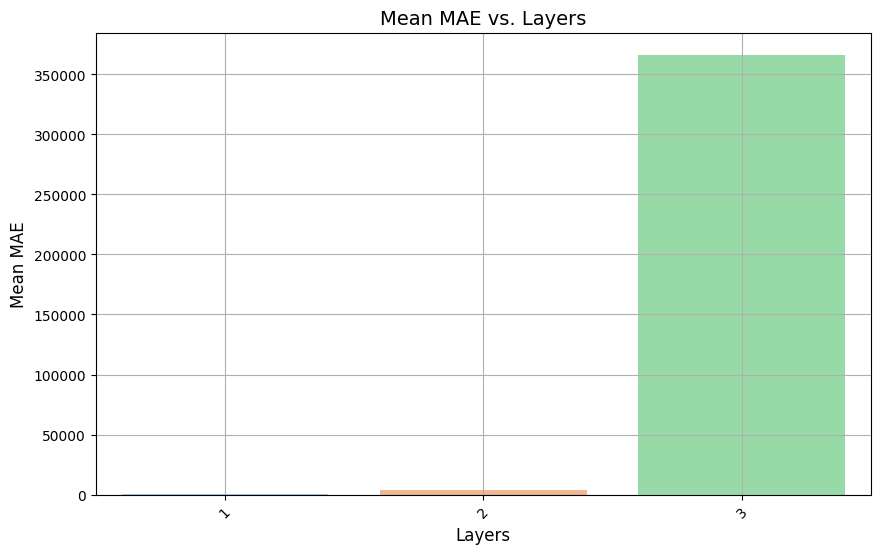

<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


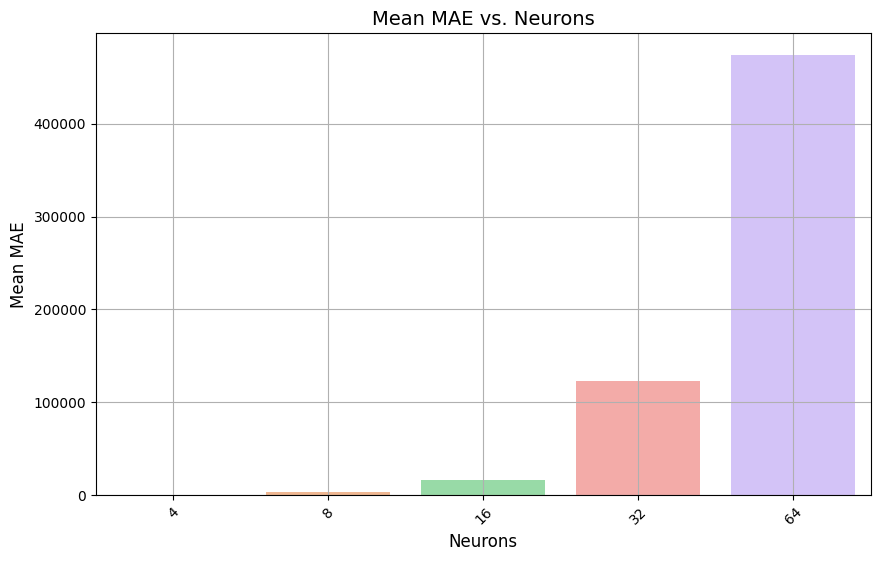

<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


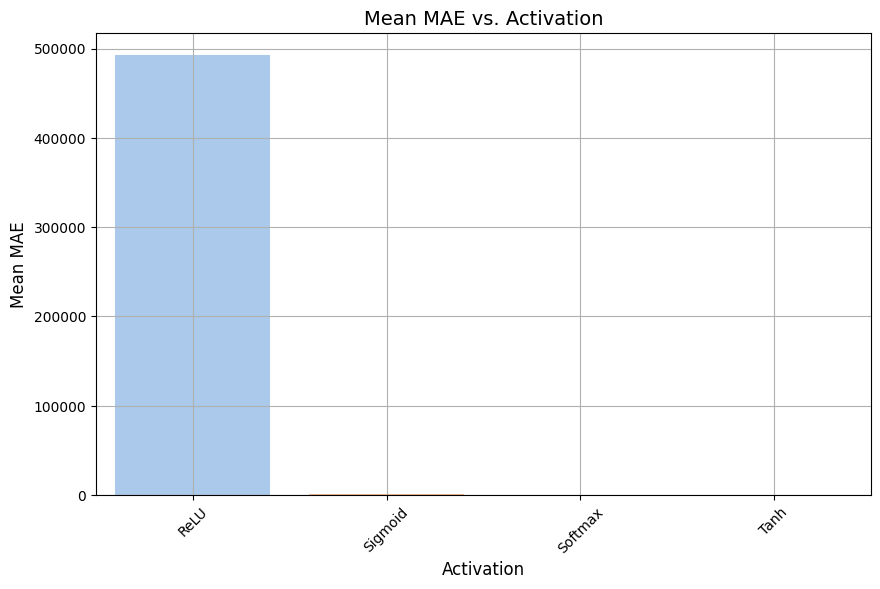

<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


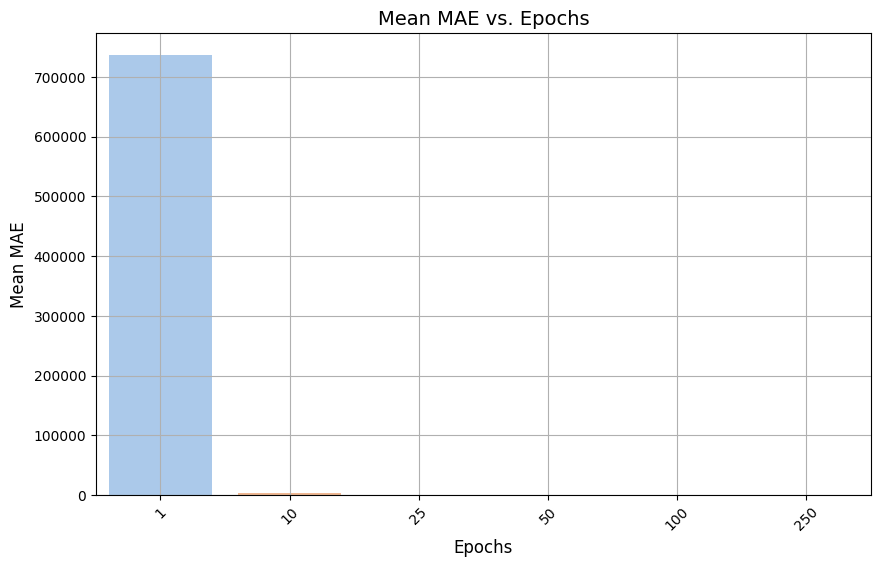

<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


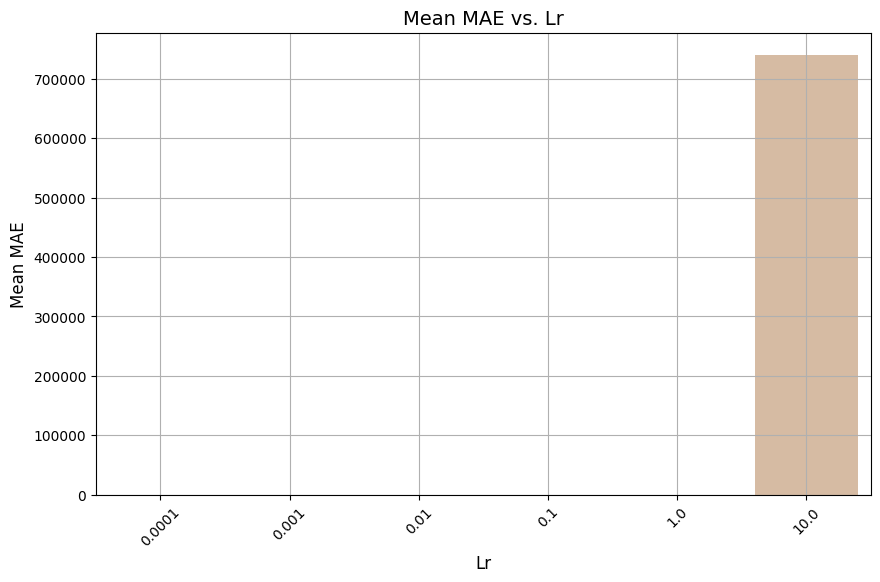

<ipython-input-35-24e299652439>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
<ipython-input-35-24e299652439>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")


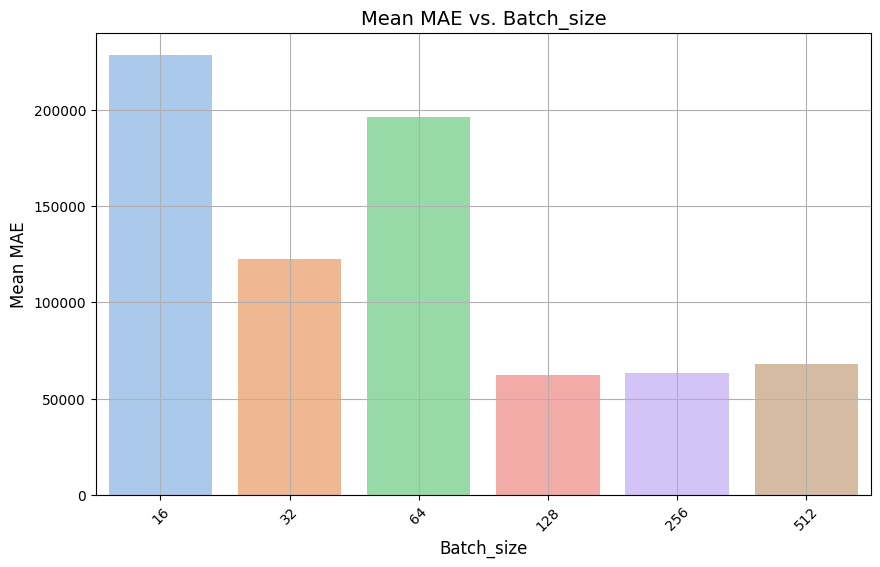

In [35]:
# Select relevant hyperparameters and mean MAE
hyperparameters = ['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size']
mean_mae_by_hyperparameter = results_df.groupby(hyperparameters)['mae'].mean().reset_index()

# Plot mean MAE against each hyperparameter
for param in hyperparameters:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_mae_by_hyperparameter, x=param, y='mae', ci=None, palette="pastel")
    plt.title(f'Mean MAE vs. {param.capitalize()}', fontsize=14)
    plt.xlabel(param.capitalize(), fontsize=12)
    plt.ylabel('Mean MAE', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()